## Part 1: Understanding Optimizers

### 1. Role of Optimization Algorithms in Neural Networks
- **Definition**: Optimization algorithms adjust the weights of the neural network to minimize the loss function.
- **Necessity**: They are essential because they help in finding the optimal weights that minimize the difference between the predicted output and the actual output during training, which leads to better model performance.

### 2. Gradient Descent and Variants
- **Gradient Descent**: A first-order optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.
- **Variants**:
  - **Batch Gradient Descent**: Uses the entire dataset to compute the gradient. It converges but is slow for large datasets and requires more memory.
  - **Stochastic Gradient Descent (SGD)**: Uses one sample at a time. It converges faster and uses less memory but can be noisy.
  - **Mini-batch Gradient Descent**: A compromise that uses a small batch of samples. It balances convergence speed and memory requirements.
- **Trade-offs**: 
  - **Convergence Speed**: SGD converges faster than Batch Gradient Descent but can oscillate.
  - **Memory Requirements**: Batch requires more memory; SGD requires less.

### 3. Challenges of Traditional Methods
- **Challenges**:
  - **Slow Convergence**: Especially with large datasets.
  - **Local Minima**: Getting stuck in local minima rather than finding the global minimum.
- **Modern Optimizers**: Algorithms like Adam, RMSprop, and Adagrad use adaptive learning rates and momentum to address slow convergence and local minima issues.

### 4. Momentum and Learning Rate
- **Momentum**: Helps accelerate SGD in the relevant direction and dampens oscillations. It accumulates past gradients to smooth out updates.
- **Learning Rate**: Determines the size of the steps taken towards the minimum. A small learning rate can lead to slow convergence, while a large learning rate can cause overshooting and divergence.
- **Impact on Convergence**: Properly tuning momentum and learning rate can lead to faster convergence and better model performance.

## Part 2: Optimizer Techniques

### 5. Stochastic Gradient Descent (SGD)
- **Concept**: Updates weights using only one sample at a time.
- **Advantages**: 
  - Faster updates, less memory usage.
  - Can escape local minima due to its noise.
- **Limitations**: 
  - High variance in updates can lead to non-convergence.
- **Suitable Scenarios**: Large datasets and online learning scenarios.

### 6. Adam Optimizer
- **Concept**: Combines the benefits of Momentum and RMSprop. It uses moving averages of gradients and squared gradients to adjust the learning rate.
- **Benefits**: 
  - Adaptive learning rates per parameter.
  - Generally faster convergence.
- **Potential Drawbacks**: 
  - May require more tuning compared to simpler methods.
  - Can be less stable on certain datasets.

### 7. RMSprop Optimizer
- **Concept**: An adaptive learning rate method that uses a moving average of squared gradients to normalize the gradients.
- **Strengths**: 
  - Addresses the diminishing learning rate issue found in other methods.
  - Works well with non-stationary objectives.
- **Comparison with Adam**: 
  - Adam incorporates momentum while RMSprop does not.
  - Adam generally performs better for most tasks, but RMSprop may be preferred in certain situations.

## Part 3: Applying Optimizers

### 8. Implementing Optimizers
Here’s a code template that compares SGD, Adam, and RMSprop using TensorFlow/Keras on a suitable dataset like the MNIST dataset:

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


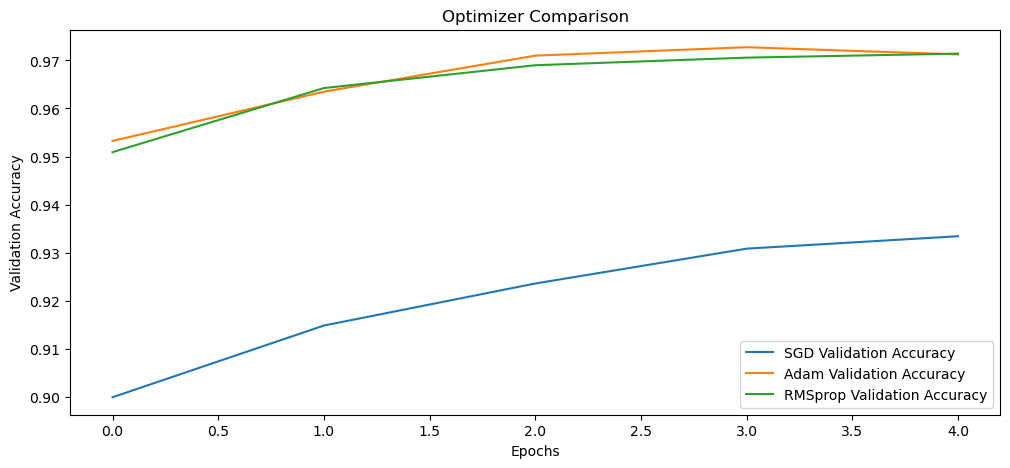

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a function to create and compile the model
def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop()
}

results = {}

# Train and evaluate each optimizer
for name, optimizer in optimizers.items():
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=0)
    results[name] = history.history

# Plot the results
plt.figure(figsize=(12, 5))
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=f'{name} Validation Accuracy')
plt.title('Optimizer Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### 9. Considerations and Trade-offs for Choosing Optimizers
- **Convergence Speed**: Faster optimizers can lead to quicker training but may overshoot minima.
- **Stability**: Some optimizers (e.g., Adam) are generally more stable than others (e.g., SGD) in terms of convergence.
- **Generalization Performance**: The choice of optimizer can impact how well the model generalizes to unseen data. It's essential to validate using test datasets.
- **Task-Specific Factors**: Consider dataset size, dimensionality, and the specific architecture of the neural network when choosing an optimizer.